## Zillow
Create a python script or jupyter notebook named explore_zillow that does the following:

1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.
1. Plot a correlation matrix heatmap.
1. Plot latitude agains longitude.
1. Create a useable plot with 4 dimensions, e.g. x, y, color, size.
1. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.
1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from wrangle_zillow import wrangle_zillow_data

In [2]:
df = wrangle_zillow_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32134 entries, 3 to 77380
Data columns (total 25 columns):
heatingorsystemtypeid           32134 non-null float64
propertylandusetypeid           32134 non-null float64
parcelid                        32134 non-null int64
logerror                        32134 non-null float64
transactiondate                 32134 non-null object
id                              32134 non-null int64
bathroomcnt                     32134 non-null float64
bedroomcnt                      32134 non-null float64
buildingqualitytypeid           32134 non-null float64
calculatedfinishedsquarefeet    32134 non-null float64
fips                            32134 non-null float64
latitude                        32134 non-null float64
longitude                       32134 non-null float64
lotsizesquarefeet               32134 non-null float64
rawcensustractandblock          32134 non-null float64
regionidcity                    32134 non-null float64
regionidcounty  

1.

In [18]:
continuous_data = df[['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'lotsizesquarefeet', 'fips', 'latitude', 'longitude' ]]

In [19]:
scaler = MinMaxScaler()

scaled_continuous_data = continuous_data.copy()

scaler.fit(scaled_continuous_data)
scaler.transform(scaled_continuous_data)

array([[0.45894519, 0.2       , 0.3       , ..., 0.        , 0.61189472,
        0.52720489],
       [0.46926929, 0.2       , 0.3       , ..., 0.        , 0.54424676,
        0.57626973],
       [0.46524096, 0.2       , 0.3       , ..., 0.        , 0.41908945,
        0.71558138],
       ...,
       [0.47311463, 0.        , 0.2       , ..., 0.        , 0.47366968,
        0.69039957],
       [0.47009753, 0.1       , 0.2       , ..., 0.        , 0.40383486,
        0.72380343],
       [0.44943309, 0.1       , 0.2       , ..., 0.        , 0.45334985,
        0.8010005 ]])

<Figure size 1152x576 with 0 Axes>

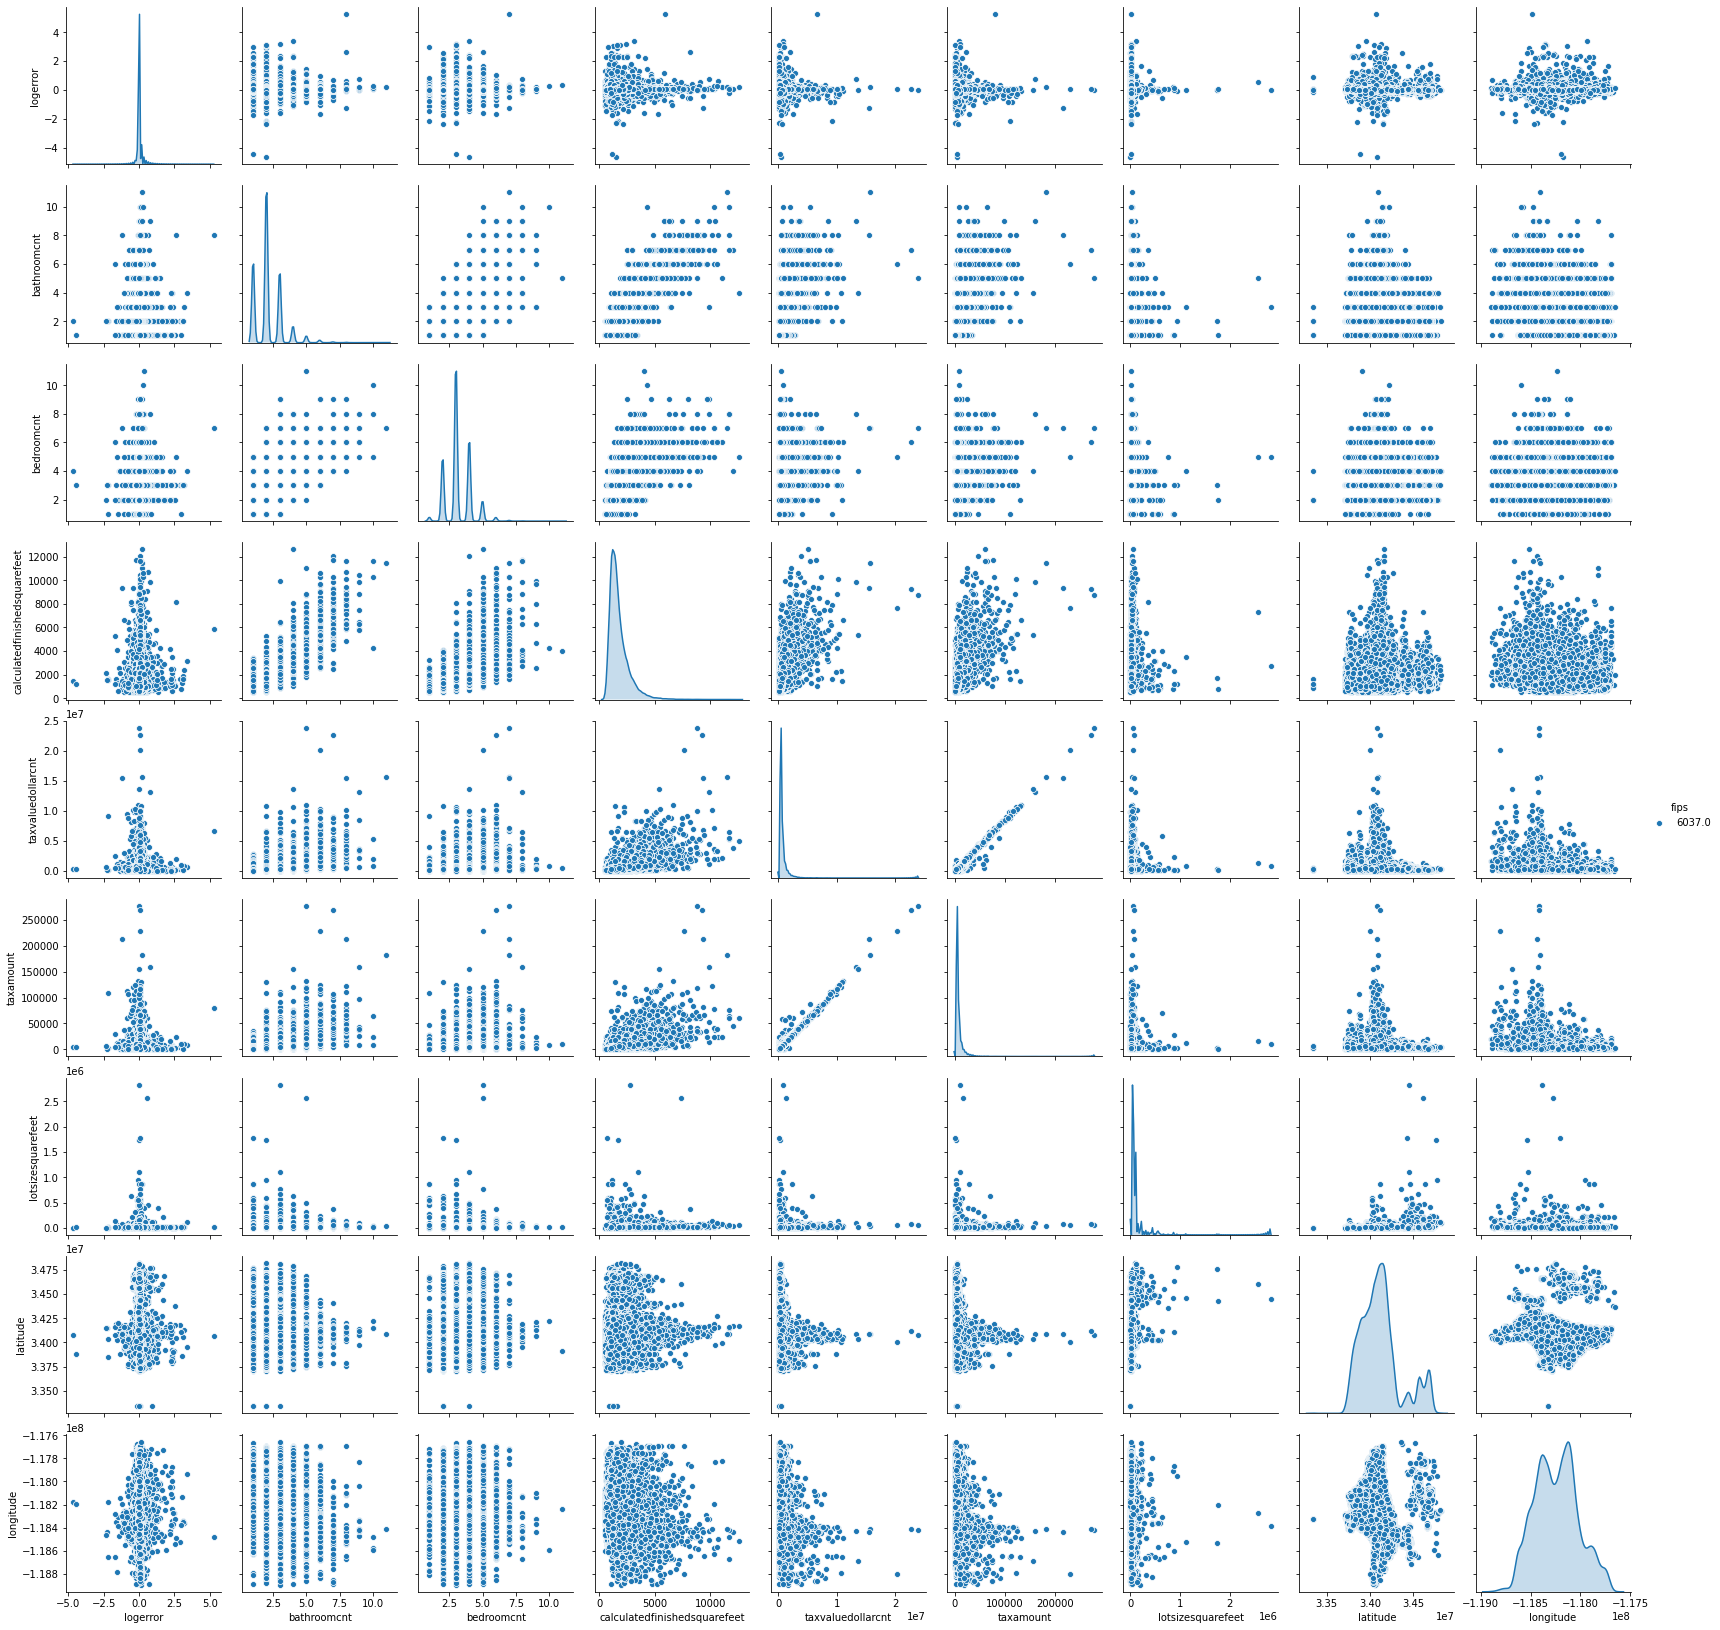

In [20]:
plt.figure(figsize=(16,8))
sns.pairplot(scaled_continuous_data, hue='fips')
plt.show()

2

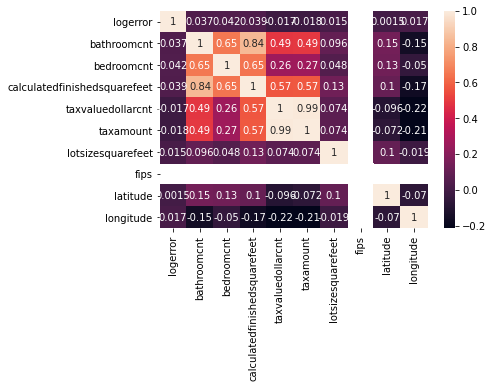

In [21]:
sns.heatmap(scaled_continuous_data.corr(), annot=True)
plt.show()

3.

In [22]:
lat_long = scaled_continuous_data[['latitude', 'longitude']]

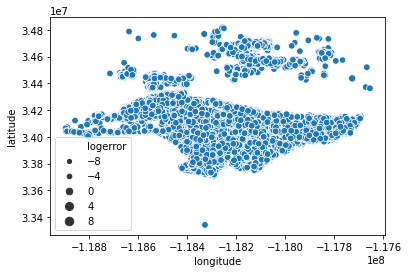

In [27]:
y = scaled_continuous_data.latitude
x = scaled_continuous_data.longitude
sns.scatterplot(x, y, data=scaled_continuous_data, size='logerror')

4.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32134 entries, 3 to 77380
Data columns (total 25 columns):
heatingorsystemtypeid           32134 non-null float64
propertylandusetypeid           32134 non-null float64
parcelid                        32134 non-null int64
logerror                        32134 non-null float64
transactiondate                 32134 non-null object
id                              32134 non-null int64
bathroomcnt                     32134 non-null float64
bedroomcnt                      32134 non-null float64
buildingqualitytypeid           32134 non-null float64
calculatedfinishedsquarefeet    32134 non-null float64
fips                            32134 non-null float64
latitude                        32134 non-null float64
longitude                       32134 non-null float64
lotsizesquarefeet               32134 non-null float64
rawcensustractandblock          32134 non-null float64
regionidcity                    32134 non-null float64
regionidcounty  

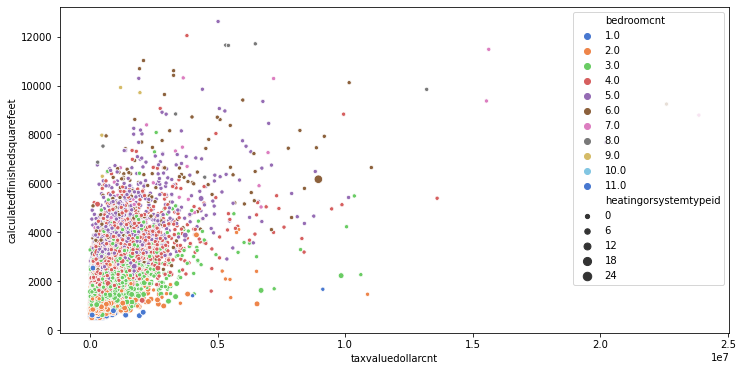

In [11]:
plt.figure(figsize=(12,6))
y = df.calculatedfinishedsquarefeet
x = df.taxvaluedollarcnt
z = df.bedroomcnt
d = df.heatingorsystemtypeid
sns.scatterplot(x, y, hue = z, size = d, data = df, palette='muted')

plt.show()

5.Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [33]:
logmean = df.groupby('regionidzip').logerror.mean().reset_index()
logmean['overall_mean_logerror'] = df.logerror.mean()

In [36]:
logmean

,regionidzip,logerror,overall_mean_logerror
0,95982.0,0.003098,0.014501
1,95983.0,0.005311,0.014501
2,95984.0,-0.073891,0.014501
3,95985.0,-0.035761,0.014501
4,95986.0,-0.014590,0.014501
...,...,...,...
264,97329.0,0.016234,0.014501
265,97330.0,0.013363,0.014501
266,97331.0,0.037615,0.014501
267,97344.0,0.027015,0.014501


In [41]:
import scipy.stats as stats

confidence_level = 0.99
alpha = 1 - confidence_level

In [42]:
# Write a loop

zipcodes = df.regionidzip.unique()
zipcode = zipcodes[0]

In [49]:
population_mean = logmean.overall_mean_logerror
population_mean = population_mean[0]

In [50]:
t, p = stats.ttest_1samp(df[df.regionidzip == zipcode].logerror, population_mean)

In [51]:
null_hypothesis = "population logerror and logerror of this zip are the same"

if p < alpha:
    print("We reject the null hypothesis that ", null_hypothesis)
else:
    print("We fail to reject the null hypothesis ", null_hypothesis)

We fail to reject the null hypothesis  population logerror and logerror of this zip are the same


In [52]:
zipcodes_with_significantly_different_errors = []

In [53]:
zipcodes = df.regionidzip.unique()

# if we reject the null we add that zipcode to a list
for zipcode in zipcodes:
    t, p = stats.ttest_1samp(df[df.regionidzip == zipcode].logerror, population_mean)
    if p < alpha:
        zipcodes_with_significantly_different_errors.append(zipcode)

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [54]:
zipcodes_with_significantly_different_errors

[96237.0,
 96517.0,
 96387.0,
 95984.0,
 96280.0,
 96020.0,
 96137.0,
 96197.0,
 96379.0,
 96134.0,
 96047.0,
 96339.0,
 96022.0,
 96026.0,
 96005.0,
 95989.0,
 96326.0,
 96152.0,
 96120.0,
 96465.0,
 96007.0,
 96246.0,
 96043.0]

In [55]:
properties_with_low_or_high_error = df[df.regionidzip.isin(zipcodes_with_significantly_different_errors)]
properties_with_low_or_high_error

,heatingorsystemtypeid,propertylandusetypeid,parcelid,logerror,transactiondate,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,heatingorsystemdesc
25,7.0,261.0,12531488,0.042041,2017-01-02,1723297,1.0,3.0,4.0,1641.0,...,46298.0,3101.0,96237.0,0.0,1944.0,432754.0,5212.75,6.037578e+13,Single Family Residential,Floor/Wall
57,2.0,261.0,13007403,-0.028719,2017-01-02,711009,3.0,3.0,8.0,2380.0,...,14111.0,3101.0,96517.0,0.0,1991.0,654279.0,7676.28,6.037432e+13,Single Family Residential,Central
71,2.0,261.0,10808296,0.008475,2017-01-02,2655846,3.0,3.0,8.0,2406.0,...,12447.0,3101.0,96387.0,0.0,1979.0,605540.0,7345.85,6.037138e+13,Single Family Residential,Central
112,7.0,261.0,12188496,-0.316484,2017-01-03,1945453,1.0,3.0,5.0,1040.0,...,12447.0,3101.0,95984.0,0.0,1923.0,234319.0,2954.12,6.037239e+13,Single Family Residential,Floor/Wall
113,7.0,261.0,11878863,-0.110952,2017-01-03,2376549,1.0,3.0,4.0,968.0,...,27183.0,3101.0,96280.0,0.0,1951.0,37210.0,1092.39,6.037481e+13,Single Family Residential,Floor/Wall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77207,7.0,261.0,11398926,-0.011094,2017-09-19,2389572,1.0,2.0,5.0,512.0,...,45888.0,3101.0,96134.0,0.0,1921.0,68600.0,1126.78,6.037601e+13,Single Family Residential,Floor/Wall
77229,7.0,261.0,11714552,-0.093713,2017-09-19,1033685,2.0,2.0,6.0,1510.0,...,12447.0,3101.0,95989.0,0.0,1941.0,255383.0,3171.96,6.037234e+13,Single Family Residential,Floor/Wall
77236,7.0,261.0,11468343,0.093275,2017-09-19,123026,1.0,2.0,4.0,806.0,...,12447.0,3101.0,96026.0,0.0,1942.0,133894.0,1627.79,6.037278e+13,Single Family Residential,Floor/Wall
77276,7.0,261.0,11458261,0.047536,2017-09-19,301989,2.0,4.0,6.0,1912.0,...,12447.0,3101.0,96026.0,0.0,1944.0,705001.0,8560.91,6.037277e+13,Single Family Residential,Floor/Wall
